## **IMPORT THE REQUIRED LIBRARIES AND INSTALL THEM IF NEEDED**

In [10]:
!pip install ta
!pip install yfinance

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

## **1. List of Top 50 Companies in India**

In [11]:
top_50_companies = [
    "RELIANCE.NS",   #0 Reliance Industries
    "TCS.NS",        #1 Tata Consultancy Services
    "HDFCBANK.NS",   #2 HDFC Bank
    "HINDUNILVR.NS", #3 Hindustan Unilever
    "INFY.NS",       #4 Infosys
    "ICICIBANK.NS",  #5 ICICI Bank
    "KOTAKBANK.NS",  #6 Kotak Mahindra Bank
    "SBIN.NS",       #7 State Bank of India
    "BAJFINANCE.NS", #8 Bajaj Finance
    "HDFC.NS",       #9 Housing Development Finance Corporation
    "BHARTIARTL.NS", #10 Bharti Airtel
    "ITC.NS",        #11 ITC Limited
    "ASIANPAINT.NS", #12 Asian Paints
    "MARUTI.NS",     #13 Maruti Suzuki
    "HCLTECH.NS",    #14 HCL Technologies
    "WIPRO.NS",      #15 Wipro
    "AXISBANK.NS",   #16 Axis Bank
    "LT.NS",         #17 Larsen & Toubro
    "ULTRACEMCO.NS", #18 UltraTech Cement
    "SUNPHARMA.NS",  #19 Sun Pharmaceutical Industries
    "TITAN.NS",      #20 Titan Company
    "BAJAJFINSV.NS", #21 Bajaj Finserv
    "NESTLEIND.NS",  #22 Nestle India
    "POWERGRID.NS",  #23 Power Grid Corporation of India
    "JSWSTEEL.NS",   #24 JSW Steel
    "HINDALCO.NS",   #25 Hindalco Industries
    "TATAMOTORS.NS", #26 Tata Motors
    "ADANIGREEN.NS", #27 Adani Green Energy
    "ADANIPORTS.NS", #28 Adani Ports and SEZ
    "INDUSINDBK.NS", #29 IndusInd Bank
    "DRREDDY.NS",    #30 Dr. Reddy's Laboratories
    "DIVISLAB.NS",   #31 Divi's Laboratories
    "GRASIM.NS",     #32 Grasim Industries
    "BAJAJ-AUTO.NS", #33 Bajaj Auto
    "ONGC.NS",       #34 Oil and Natural Gas Corporation
    "BPCL.NS",       #35 Bharat Petroleum Corporation
    "COALINDIA.NS",  #36 Coal India
    "BRITANNIA.NS",  #37 Britannia Industries
    "M&M.NS",        #38 Mahindra & Mahindra
    "SHREECEM.NS",   #39 Shree Cement
    "HEROMOTOCO.NS", #40 Hero MotoCorp
    "TECHM.NS",      #41 Tech Mahindra
    "SBILIFE.NS",    #42 SBI Life Insurance
    "CIPLA.NS",      #43 Cipla
    "ICICIPRULI.NS", #44 ICICI Prudential Life Insurance
    "DMART.NS",      #45 Avenue Supermarts (DMart)
    "AMBUJACEM.NS",  #46 Ambuja Cements
    "VEDL.NS",       #47 Vedanta
    "PIDILITIND.NS", #48 Pidilite Industries
    "DABUR.NS"       #49 Dabur India
]


## **2. User Input for Stock Selection**

In [12]:
# Prompt the user to enter an index for a stock from the top 50 companies list, validate the index, and retrieve the corresponding ticker symbol or exit if the index is invalid.
ticker_symbol_index = int(input("Enter the index of the stock you want to analyze: "))
if ticker_symbol_index < 0 or ticker_symbol_index >= len(top_50_companies):
    print("Invalid index. Please enter a valid index.")
    exit()
ticker_symbol = top_50_companies[ticker_symbol_index]


Enter the index of the stock you want to analyze: 25


## **3. Fetch Historical Data**

In [13]:
# Fetch historical data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start='2022-04-01', end='2024-04-01')


[*********************100%%**********************]  1 of 1 completed


## **4. Calculate Technical Indicators**

In [14]:
# Calculate Moving Averages (MA)
sma_20 = SMAIndicator(close=stock_data['Close'], window=20)
sma_50 = SMAIndicator(close=stock_data['Close'], window=50)

# Calculate RSI (Relative Strength Index)
rsi_14 = RSIIndicator(close=stock_data['Close'], window=14)

# Add calculated values to the DataFrame
stock_data['MA20'] = sma_20.sma_indicator()
stock_data['MA50'] = sma_50.sma_indicator()
stock_data['RSI14'] = rsi_14.rsi()


# **5. Plotting Stock Data and Technical Indicators**

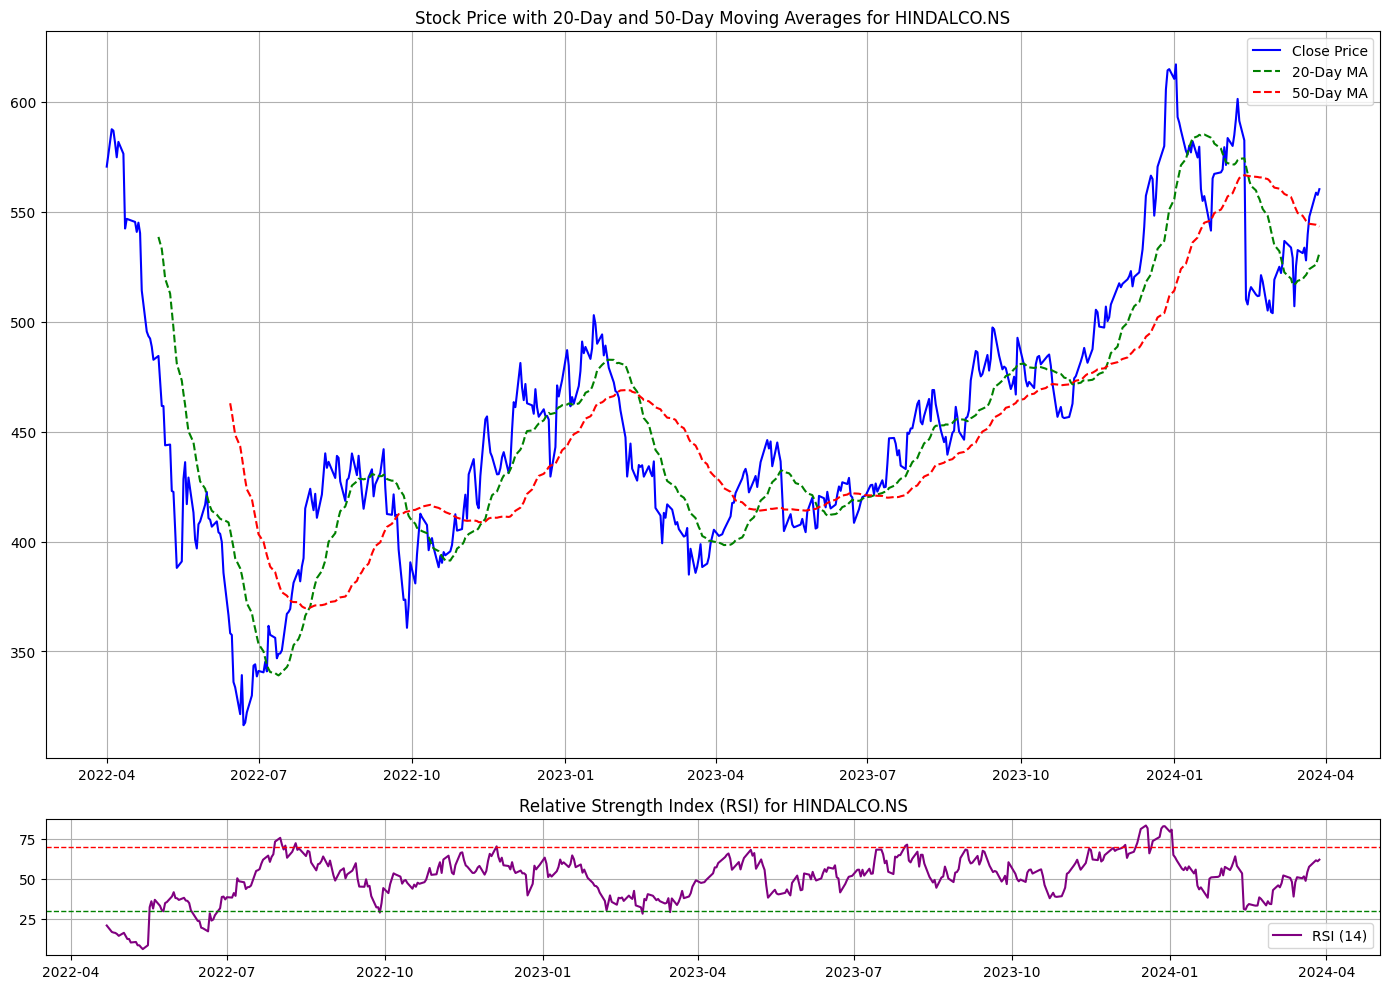

In [15]:
# Plotting
plt.figure(figsize=(14, 10))
gs = plt.GridSpec(5, 1)

# Plot Close Price and Moving Averages in Upper 4/5th of the plot
plt.subplot(gs[:4, 0])
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['MA20'], label='20-Day MA', color='green', linestyle='--')
plt.plot(stock_data['MA50'], label='50-Day MA', color='red', linestyle='--')
plt.title(f'Stock Price with 20-Day and 50-Day Moving Averages for {ticker_symbol}')
plt.legend()
plt.grid()

# Plot RSI in Lower 1/5th of the plot
plt.subplot(gs[4, 0])
plt.plot(stock_data['RSI14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', linewidth=1)
plt.axhline(30, color='green', linestyle='--', linewidth=1)
plt.title(f'Relative Strength Index (RSI) for {ticker_symbol}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# **Inferences from the Above Plot**
### **Stock Price with Moving Averages**
**Trend Identification**:
* The close price plotted with the 20-day and 50-day moving averages helps identify trends.
* Support and Resistance Levels: The MAs can indicate potential support or resistance levels.
* Buy/Sell Signals: Crossovers between the MAs can signal potential buy or sell opportunities.

### **Relative Strength Index (RSI)** :
* Overbought/Oversold Conditions: The RSI indicates overbought (above 70) or oversold (below 30) conditions.
* Trading Signals: These levels can provide potential signals for buying or selling the stock.


---



**Thanks For Your Time .**